In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats



%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
years = ['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16']

In [ ]:
# f = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/game_logs_1946-2016/game_logs%s.csv'
# data = []

# for z in years:
#     df = pd.read_csv(f % z)
#     data.append(df)
# df_gamelogs = pd.concat(data)
# save_csv = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/all_game_logs_96_2016.csv'
# df_gamelogs.to_csv(save_csv)

In [ ]:
df_gamelogs.head()

In [ ]:
df_gamelogs['FP'] = (df_gamelogs['FG3M'] * 0.5) + (df_gamelogs['PTS'] * 1.0) + (df_gamelogs['REB'] * 1.2) + (df_gamelogs['AST'] * 1.5) + \
(df_gamelogs['STL'] * 2.0) + (df_gamelogs['BLK'] * 2.0) - (df_gamelogs['TOV'] * 1.0)
df_gamelogs.to_csv(save_csv)

In [2]:
games = pd.read_csv('/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/all_game_logs_96_2016.csv')
games.head()

,Unnamed: 0,Unnamed: 0.1,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,FP
0,0,0,21996,893,Michael Jordan,CHI,Chicago Bulls,29600565,1997-01-21,CHI vs. NYK,...,4,4,2,0,2,1,51,7,0,66.3
1,1,1,21996,947,Allen Iverson,PHI,Philadelphia 76ers,29601127,1997-04-12,PHI @ CLE,...,5,6,2,0,9,5,50,-4,0,62.5
2,2,2,21996,893,Michael Jordan,CHI,Chicago Bulls,29600043,1996-11-06,CHI @ MIA,...,6,0,1,1,0,1,50,9,0,61.7
3,3,3,21996,779,Glen Rice,CHH,Charlotte Hornets,29600858,1997-03-06,CHH vs. BOS,...,4,1,0,1,3,1,48,3,0,55.8
4,4,4,21996,165,Hakeem Olajuwon,HOU,Houston Rockets,29600627,1997-01-30,HOU vs. DEN,...,10,3,0,2,3,3,48,-1,0,65.5


In [ ]:
games['Season'] = games

In [3]:
games.GAME_DATE = pd.to_datetime(games.GAME_DATE)
games.set_index('GAME_DATE', inplace=True)

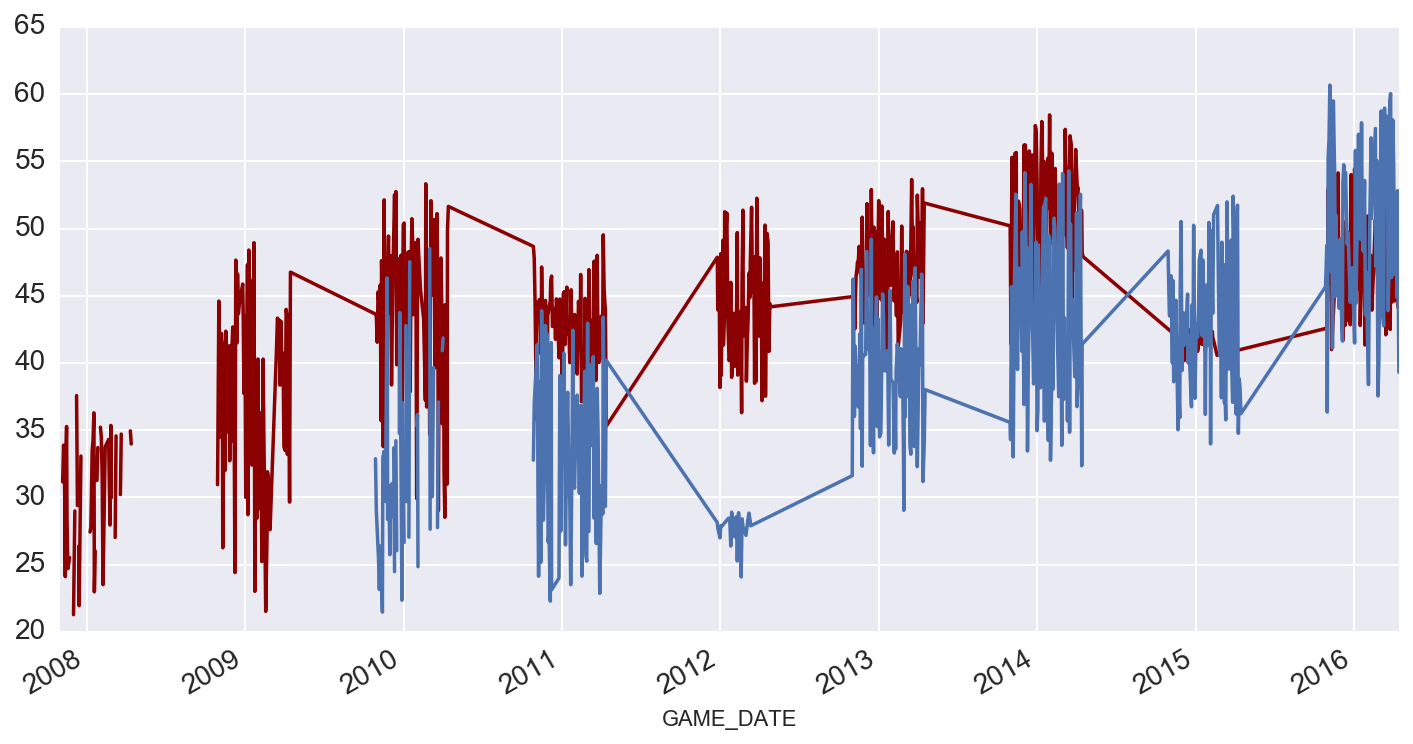

In [12]:
games[(games.PLAYER_NAME == "Kevin Durant") & (games.index.year > 1996)]['FP'].rolling(window=30).mean().plot(figsize=(12,6), fontsize=14,color='darkred')
games[(games.PLAYER_NAME == "Stephen Curry") & (games.index.year > 1996)]['FP'].rolling(window=30).mean().plot(figsize=(12,6), fontsize=14)

In [19]:
stephen = games[games['PLAYER_NAME'] == 'Stephen Curry']
stephen.head()

,Unnamed: 0,Unnamed: 0.1,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,MATCHUP,WL,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,FP
GAME_DATE,,,,,,,,,,,,,,,,,,,,,
2010-04-14,29,29,22009,201939,Stephen Curry,GSW,Golden State Warriors,20901229,GSW @ POR,W,...,9,8,2,1,2,0,42,6,0,70.8
2010-02-10,138,138,22009,201939,Stephen Curry,GSW,Golden State Warriors,20900778,GSW vs. LAC,W,...,10,13,3,0,6,4,36,35,0,71.0
2010-03-13,162,162,22009,201939,Stephen Curry,GSW,Golden State Warriors,20900982,GSW vs. TOR,W,...,6,10,4,1,2,1,35,6,0,67.7
2010-02-21,296,296,22009,201939,Stephen Curry,GSW,Golden State Warriors,20900829,GSW vs. ATL,W,...,9,3,1,0,5,3,32,5,0,44.8
2010-01-22,309,309,22009,201939,Stephen Curry,GSW,Golden State Warriors,20900634,GSW vs. NJN,W,...,2,7,4,0,2,4,32,32,0,52.4


In [21]:
stephen['year'] = stephen.index.year
stephen.head()

/Users/amos/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Unnamed: 0,Unnamed: 0.1,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,MATCHUP,WL,...,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,FP,year
GAME_DATE,,,,,,,,,,,,,,,,,,,,,
2010-04-14,29,29,22009,201939,Stephen Curry,GSW,Golden State Warriors,20901229,GSW @ POR,W,...,8,2,1,2,0,42,6,0,70.8,2010
2010-02-10,138,138,22009,201939,Stephen Curry,GSW,Golden State Warriors,20900778,GSW vs. LAC,W,...,13,3,0,6,4,36,35,0,71.0,2010
2010-03-13,162,162,22009,201939,Stephen Curry,GSW,Golden State Warriors,20900982,GSW vs. TOR,W,...,10,4,1,2,1,35,6,0,67.7,2010
2010-02-21,296,296,22009,201939,Stephen Curry,GSW,Golden State Warriors,20900829,GSW vs. ATL,W,...,3,1,0,5,3,32,5,0,44.8,2010
2010-01-22,309,309,22009,201939,Stephen Curry,GSW,Golden State Warriors,20900634,GSW vs. NJN,W,...,7,4,0,2,4,32,32,0,52.4,2010


In [24]:
stephen.groupby(['year'])['year'].count()

year
2009    31
2010    73
2011    53
2012    54
2013    77
2014    78
2015    80
2016    49
Name: year, dtype: int64